# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#pip install citipy

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs) # tuple to get the indexes

# Identify nearest city for each lat, lng combination
# (For every coords in lat_longs find the nearest city and append every unique value to cities list)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:

# check response for a random city, inorder to see if our code is correct

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"


#Build query url

queryURL = f"{url}appid={api_key}&units={units}&q=" 
response = requests.get(queryURL + "California").json()
print(response)

{'coord': {'lon': -76.5074, 'lat': 38.3004}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 91.47, 'feels_like': 104.07, 'temp_min': 88.65, 'temp_max': 93.94, 'pressure': 1016, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1658700676, 'sys': {'type': 2, 'id': 2011802, 'country': 'US', 'sunrise': 1658656888, 'sunset': 1658708597}, 'timezone': -14400, 'id': 4350049, 'name': 'California', 'cod': 200}


In [20]:


url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"


#Build query url

queryURL = f"{url}appid={api_key}&units={units}&q=" 


# Create an empty response list to store responses and lists
city_name = []
latitude = []
longitude = []
maxTempFs = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print("Beginning Data Retrieval:\n"
     "-----------------------------------")
# Set counters
index_counter = 0
set_counter = 1
# Make a request for each city using a for loop
for i, city in enumerate (cities, start = 1):
    try:
        response = requests.get(queryURL + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        maxTempFs.append(response['main']['temp_max'])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval:
-----------------------------------
Processing Record 1 of Set 1 | fortaleza
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | sorong
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | sioux lookout
Processing Record 13 of Set 1 | smidovich
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | del rio
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | kuznechikha
Processing Record 21 of Set 1 | storsteinnes
Processing Record 22 of Set 1 | dicabisagan
Processing Record 23 of Set 1

Processing Record 34 of Set 4 | tselinnoye
Processing Record 35 of Set 4 | pedernales
Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | maceio
Processing Record 38 of Set 4 | adrar
Processing Record 39 of Set 4 | shenxian
Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | churapcha
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | zhigansk
Processing Record 46 of Set 4 | lichuan
Processing Record 47 of Set 4 | amuntai
Processing Record 48 of Set 4 | weihai
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | bom jardim
City not found. Skipping...
Processing Record 0 of Set 5 | labuhan
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | karpathos
Processing Record 3 of Set 5 | suez
Processing Record 4 of Set 5 | vila
Processing Record 5 of Set 5 | mentakab
Processing Record 6 of Set 5 | ja

Processing Record 25 of Set 8 | blackwater
Processing Record 26 of Set 8 | kizukuri
Processing Record 27 of Set 8 | portland
Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | matara
Processing Record 30 of Set 8 | fairview
Processing Record 31 of Set 8 | bima
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | antsohihy
Processing Record 34 of Set 8 | oxelosund
Processing Record 35 of Set 8 | kang
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | abalak
Processing Record 38 of Set 8 | port keats
Processing Record 39 of Set 8 | spokane
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | northam
Processing Record 42 of Set 8 | malanje
Processing Record 43 of Set 8 | andenes
Processing Record 44 of Set 8 | saint-leu
Processing Record 45 of Set 8 | houma
Processing Record 46 of Set 8 | belmonte
Processing Record 47 of Set 8 | khvoynaya
City not found. Skipping...
Processing Record 48 of Set 8 | amahai
Pro

Processing Record 6 of Set 12 | harper
Processing Record 7 of Set 12 | qaqortoq
Processing Record 8 of Set 12 | zhanaozen
Processing Record 9 of Set 12 | khasan
Processing Record 10 of Set 12 | jeremie
Processing Record 11 of Set 12 | ceres
Processing Record 12 of Set 12 | nortelandia
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
#use the info in the lists and make a dataframe

weatherDictionary = {
    
    "City" : city_name,
    "Lat" : latitude,
    "Lng" : longitude,
    "Max Temp" : maxTempFs,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date"    : date
 }

weatherDF =pd.DataFrame(weatherDictionary)
weatherDF.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortaleza,-3.7227,-38.5247,80.73,78,75,13.80,BR,1658702145
1,Kavaratti,10.5669,72.6420,81.16,75,100,14.29,IN,1658702396
2,Airai,-8.9266,125.4092,57.13,55,56,2.46,TL,1658702241
3,East London,-33.0153,27.9116,59.13,62,74,7.67,ZA,1658702244
4,Saint-Philippe,-21.3585,55.7679,65.21,80,44,9.22,RE,1658702242


In [54]:
weatherDF.to_csv("Resources/weatherdata.csv")

In [55]:
weatherDF=pd.read_csv("Resources/weatherdata.csv")
#weatherDF

In [56]:
weatherDF.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,286.000000,19.990526,15.104907,70.170192,72.251309,56.061082,7.518534,1.658702e+09
std,165.555127,32.940628,90.675537,13.823857,20.078770,38.293239,5.117154,1.118620e+02
min,0.000000,-54.800000,-179.166700,31.860000,1.000000,0.000000,0.000000,1.658702e+09
25%,143.000000,-7.958900,-65.102300,60.930000,63.000000,18.000000,3.470000,1.658702e+09
50%,286.000000,25.400000,16.341000,71.510000,78.000000,70.000000,6.350000,1.658702e+09
75%,429.000000,46.873900,100.335400,79.750000,87.000000,94.000000,10.360000,1.658702e+09
max,572.000000,78.218600,178.416700,105.800000,100.000000,100.000000,29.930000,1.658703e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#  Get the indices of cities that have humidity over 100%.

HumidityDF = weatherDF.loc[weatherDF["Humidity"] > 100]
HumidityDF.index

Int64Index([], dtype='int64')

In [58]:
# Since we don't have any indices of humidty > 100 % then we just rename our datarame 
Clean_city_data = pd.DataFrame(weatherDF)
Clean_city_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Fortaleza,-3.7227,-38.5247,80.73,78,75,13.80,BR,1658702145
1,1,Kavaratti,10.5669,72.6420,81.16,75,100,14.29,IN,1658702396
2,2,Airai,-8.9266,125.4092,57.13,55,56,2.46,TL,1658702241
3,3,East London,-33.0153,27.9116,59.13,62,74,7.67,ZA,1658702244
4,4,Saint-Philippe,-21.3585,55.7679,65.21,80,44,9.22,RE,1658702242


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

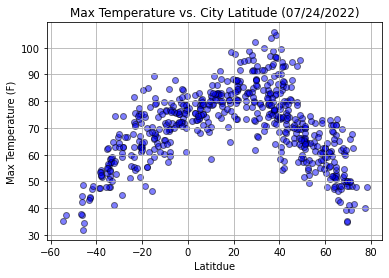

<Figure size 432x288 with 0 Axes>

In [132]:
plt.scatter(Clean_city_data['Lat'],Clean_city_data['Max Temp'],c = 'b', marker = "o", edgecolors="black", alpha = 0.5)
plt.title("Max Temperature vs. City Latitude (07/24/2022)")
plt.xlabel("Latitdue")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle= "-")

plt.show()
plt.savefig("WeatherPyImages/lat_vs_temp.png")

From the plot above, we can conclude that the 500 cities that were randomly selected mostly fall above the equator. The cities at the equator project a max temp between 70-80 degrees F. The cities that are 40 degrees north of the equator project max temps ranging between 55- 100 degrees F. The cities that are close to 80 degrees north of the equator project max temperature between 40-50 degrees F. 

## Latitude vs. Humidity Plot

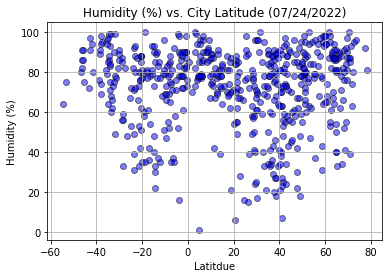

<Figure size 432x288 with 0 Axes>

In [133]:
plt.scatter(Clean_city_data['Lat'],Clean_city_data['Humidity'],c = 'b', marker = "o", edgecolors="black", alpha = 0.5)
plt.title("Humidity (%) vs. City Latitude (07/24/2022)")
plt.xlabel("Latitdue")
plt.ylabel("Humidity (%)")
plt.grid(linestyle= "-")

plt.show()
plt.savefig("WeatherPyImages/lat_vs_humidity.png")

From the plot above, we can conclude that majority of the random cities fetched by the API, have a humidity level that fall between 60-100%. None of the cities have a humidity level above 100%. 

## Latitude vs. Cloudiness Plot

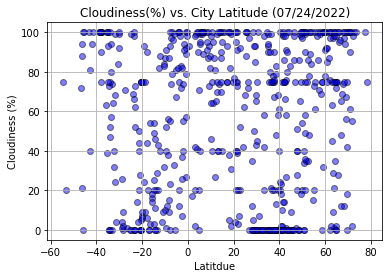

<Figure size 432x288 with 0 Axes>

In [134]:
plt.scatter(Clean_city_data['Lat'],Clean_city_data['Cloudiness'],c = 'b', marker = "o", edgecolors="black", alpha = 0.5)
plt.title("Cloudiness(%) vs. City Latitude (07/24/2022)")
plt.xlabel("Latitdue")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle= "-")

plt.show()
plt.savefig("WeatherPyImages/lat_vs_cloud.png")

From the plot above, we can see that some of the cities have zero cloudiness, some fall between the ranges of 60-100%. More cities above the equator have higher percentage of cloudiness as compared to the cities that fall under the equator. The cities below the equator have almost equal percenatge of cloudiness, most of the cities that are 20 degrees south have zero cloudiness and most of the cities that are 40 degrees south of the equator have 100% cloudiness. 

## Latitude vs. Wind Speed Plot

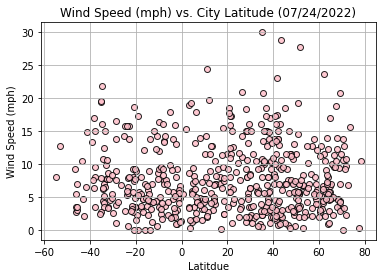

<Figure size 432x288 with 0 Axes>

In [135]:
plt.scatter(Clean_city_data['Lat'],Clean_city_data['Wind Speed'],c = 'pink', marker = "o", edgecolors="black", alpha = 0.85)
plt.title("Wind Speed (mph) vs. City Latitude (07/24/2022)")
plt.xlabel("Latitdue")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle= "-")

plt.show()
plt.savefig("WeatherPyImages/lat_vs_windspeed.png")

In this plot, we can see that majority of the cities overall have a wind speed ranging between 0-15 mph. 

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [96]:
# Separate the North Hemisphere values

# Northern Hemisphere

#North_Hemisphere = Clean_city_data.loc[Clean_city_data["Lat"] > 0 , ["Max Temp"] ] 
North_Hemisphere = Clean_city_data.loc[Clean_city_data["Lat"] >= 0 ]
North_Hemisphere

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Kavaratti,10.5669,72.6420,81.16,75,100,14.29,IN,1658702396
5,5,Vostok,46.4856,135.8833,66.36,85,100,0.72,RU,1658702263
8,8,Esim,4.8699,-2.2405,73.60,85,20,7.11,GH,1658702318
10,10,Longyearbyen,78.2186,15.6401,48.04,81,75,10.36,SJ,1658702223
11,11,Sioux Lookout,50.1001,-91.9170,57.27,82,100,11.50,CA,1658702362
...,...,...,...,...,...,...,...,...,...,...
567,567,Qaqortoq,60.7167,-46.0333,47.91,74,92,3.09,GL,1658702365
568,568,Zhangaözen,43.3000,52.8000,73.65,58,90,10.54,KZ,1658702475
569,569,Khasan,42.4308,130.6434,68.36,97,98,4.41,RU,1658702508
570,570,Jérémie,18.6500,-74.1167,82.54,70,99,2.48,HT,1658702508


The r-value is : 0.4043590446419265


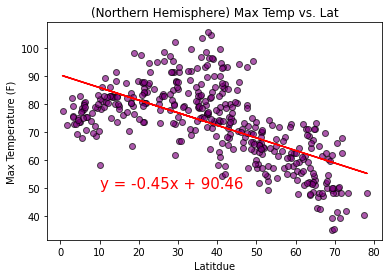

<Figure size 432x288 with 0 Axes>

In [123]:
x_values = North_Hemisphere['Lat']
y_values = North_Hemisphere['Max Temp']

plt.scatter(x_values,y_values,c = 'purple', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Northern Hemisphere) Max Temp vs. Lat")
plt.xlabel("Latitdue")
plt.ylabel("Max Temperature (F)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/north_lat_vs_temp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [105]:
# Separate the Southern Hemisphere values

# Southern Hemisphere

#South_Hemisphere = Clean_city_data.loc[Clean_city_data["Lat"] < 0 , ["Max Temp"] ] 
South_Hemisphere = Clean_city_data.loc[Clean_city_data["Lat"] < 0 ]
South_Hemisphere

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Fortaleza,-3.7227,-38.5247,80.73,78,75,13.80,BR,1658702145
2,2,Airai,-8.9266,125.4092,57.13,55,56,2.46,TL,1658702241
3,3,East London,-33.0153,27.9116,59.13,62,74,7.67,ZA,1658702244
4,4,Saint-Philippe,-21.3585,55.7679,65.21,80,44,9.22,RE,1658702242
6,6,Rocha,-34.4833,-54.3333,56.12,99,73,4.38,UY,1658702372
...,...,...,...,...,...,...,...,...,...,...
556,556,Santa Isabel,-23.3156,-46.2214,70.90,72,62,0.65,BR,1658702506
558,558,Santiago de Cao,-7.9589,-79.2392,60.93,88,100,9.22,PE,1658702507
559,559,Mildura,-34.2000,142.1500,54.07,84,100,6.35,AU,1658702239
563,563,Soyo,-6.1349,12.3689,69.94,92,33,5.84,AO,1658702507


The r-value is : 0.6057325831214301


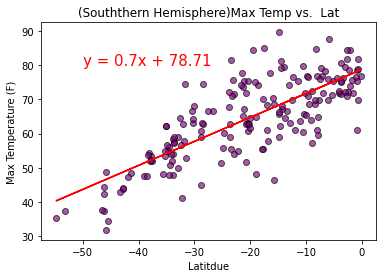

<Figure size 432x288 with 0 Axes>

In [124]:
x_values = South_Hemisphere['Lat']
y_values = South_Hemisphere['Max Temp']

plt.scatter(x_values,y_values,c = 'purple', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Souththern Hemisphere)Max Temp vs.  Lat")
plt.xlabel("Latitdue")
plt.ylabel("Max Temperature (F)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/south_lat_vs_temp.png")


From the pair of plots above, we can conclude that the northern hemisphere plot of Max Temp vs.Latitude has a negative correlation and a negative slope in our linear regression equation. We can see that as the latitude increases the temperature decreases. Whereas, in the southern hemisphere plot, we can see it has a positive correlation and Linear regression slope. We can predict from the r^2 value that 60% of the max Temp increases with a 10 degree increase in the latitude. As we go closer to the equator from the south pole, we get warmer weather conditions.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.0007309352383931208


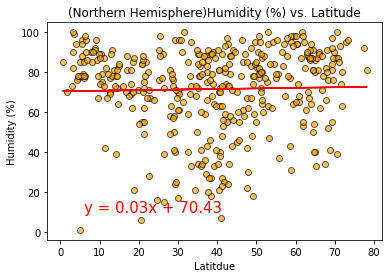

<Figure size 432x288 with 0 Axes>

In [125]:
x_values = North_Hemisphere['Lat']
y_values = North_Hemisphere['Humidity']

plt.scatter(x_values,y_values,c = 'orange', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Northern Hemisphere)Humidity (%) vs. Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Humidity (%)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/north_lat_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.023193033226956625


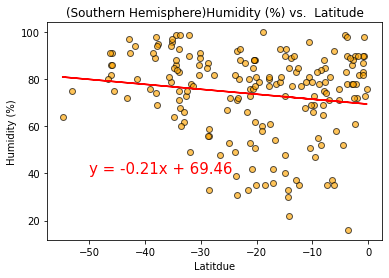

<Figure size 432x288 with 0 Axes>

In [126]:
x_values = South_Hemisphere['Lat']
y_values = South_Hemisphere['Humidity']

plt.scatter(x_values,y_values,c = 'orange', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Southern Hemisphere)Humidity (%) vs.  Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Humidity (%)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/south_lat_vs_humidity.png")

From the pair of plot above, the linear regression model shows us that the y value is almost equal to the y intercept value. There is no relation between the humidity and the latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 1.6525070844346227e-05


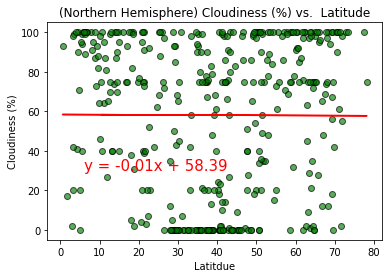

<Figure size 432x288 with 0 Axes>

In [128]:
x_values = North_Hemisphere['Lat']
y_values = North_Hemisphere['Cloudiness']

plt.scatter(x_values,y_values,c = 'green', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Northern Hemisphere) Cloudiness (%) vs.  Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Cloudiness (%)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/north_lat_vs_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.005279453241998459


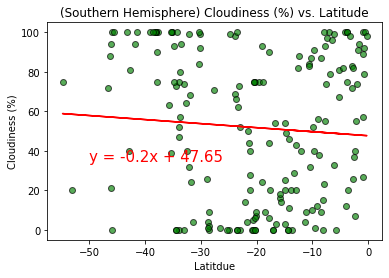

<Figure size 432x288 with 0 Axes>

In [129]:
x_values = South_Hemisphere['Lat']
y_values = South_Hemisphere['Cloudiness']

plt.scatter(x_values,y_values,c = 'green', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Southern Hemisphere) Cloudiness (%) vs. Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Cloudiness (%)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/south_lat_vs_cloud.png")

From the pair of plots above, we can see there is no correlation between the cloudiness and northern or southern hemisphere latitudes. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.00034889206566454943


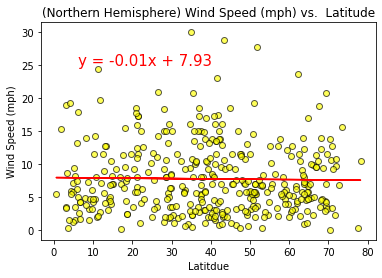

<Figure size 432x288 with 0 Axes>

In [130]:
x_values = North_Hemisphere['Lat']
y_values = North_Hemisphere['Wind Speed']

plt.scatter(x_values,y_values,c = 'yellow', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Northern Hemisphere) Wind Speed (mph) vs.  Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Wind Speed (mph)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/north_lat_vs_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.021434548124485385


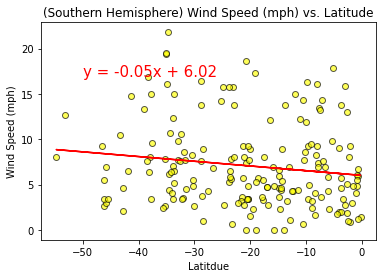

<Figure size 432x288 with 0 Axes>

In [131]:
x_values = South_Hemisphere['Lat']
y_values = South_Hemisphere['Wind Speed']

plt.scatter(x_values,y_values,c = 'yellow', marker = "o", edgecolors="black", alpha = 0.65)
plt.title("(Southern Hemisphere) Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitdue")
plt.ylabel("Wind Speed (mph)")



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

# Print r square value
print(f"The r-value is : {rvalue**2}")


# Show plot
plt.show()

# Save the image
plt.savefig("WeatherPyImages/south_lat_vs_windspeed.png")

From the pair of plots above, we can see there is no correlation between the wind speed and northern or southern hemisphere latitudes.